<a href="https://colab.research.google.com/github/SiddhantV369/predictive-modelling/blob/main/experiment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 # load dataset
df=load_diabetes()
X=df.data
y=df.target

# split train and test data

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
scl=StandardScaler()
xtrain=scl.fit_transform(xtrain)
xtest=scl.fit_transform(xtest)

In [97]:

def Mae(ytest,ypred):
  mae=(sum(abs(ytest-ypred)))/len(ytest)
  return mae

def Mse(ytest,ypred):
  mse=sum(((ytest-ypred)**2))/len(ytest)
  return mse

def Rmse(ytest,ypred):
  return math.sqrt(MSE(ytest,ypred))

def R2(ytest,ypred):
  mn=sum(ytest)/len(ytest)
  rsqr=1-(sum((ytest-ypred)**2)/(sum((ytest-mn)**2)))
  return rsqr

def adjusted_R2(ytest,ypred):
  n=len(ytest)
  k=xtest.shape[1]
  if n>k+1:
    rs=1-(1-R2(ytest,ypred))*((n-1)/(n-k-1))
    return rs
  return "cannot be calculated"


In [98]:
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import r2_score

model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)


print("MAE:", Mae(ytest,ypred))
print("MSE:", Mse(ytest,ypred))
print("RMSE:", Rmse(ytest,ypred))
print("R2:", R2(ytest,ypred))
print("Adjusted R2:", adjusted_R2(ytest,ypred))


MAE: 43.245475552753014
MSE: 2972.8515346999216
RMSE: 54.523862066987896
R2: 0.43888894168947257
Adjusted R2: 0.3669516265214562


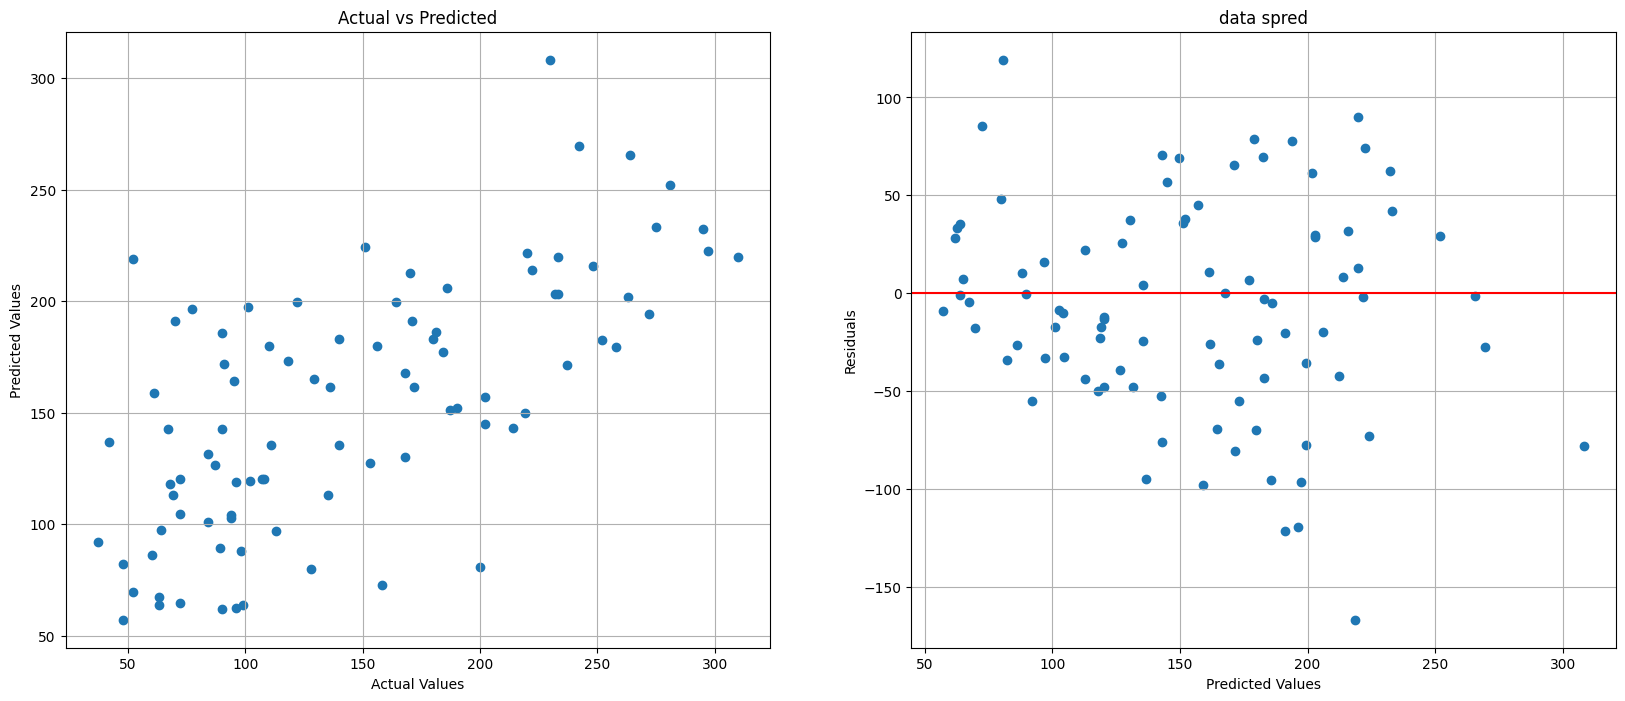

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(ytest, ypred)
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)

res = ytest - ypred

plt.subplot(1,2,2)
plt.scatter(ypred, res)
plt.title("data spred")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r')
plt.grid(True)
plt.show()